## Data Science Project (GlobalLandTemperature.csv)
INFO 1998 Fall 2020
<br>
<br>
Completed: December 16, 2020 11:59PM
<br>
<br>
Members: Emma Wang (yw345), Seungmin Lee (sl2324), Lydia Kim (lmk225)

## Preprocessing and Manipulation

Dataset: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv

### Original Problem and Hypothesis from Proposal
Problem: We want to know if there is a relationship between longitude & latitude vs. temperature change
in the major city for a period of 100 years (1913-2013). We will be looking at a specific month,
for instance the change in the temperature in March over 100 years. Moreover, we want to
predict the average temperature change of major cities based on its longitude and latitude
<br>
<br>
Hypothesis: The closer the latitude is to zero and the further away the longitude is to 0, the greater
temperature change the city will have. We are also interested in whether the temperature change
for every city is close to each other. Through this question, we want to know if all major cities
are affected by climate change the same way.

### Revised Problem and Hypothesis from Proposal
After working with our original problem and hypothesis, we discovered that it was not meaningful for us to examine the relationship between longitude & latitude and temperature changes in major cities for a period of time. We have updated the goal of our project to examine and compare the change in temperatures between two major cities. We have chosen two cities, Los Angeles and St. Petersburg, for our project as they are on opposite sides of the world. We wanted to see given the temperature of the 1st day of March from 1950-1957, could we predict the temperature of the 1st day of March from 1957-2013. We wanted to compare the models and see if both models would produce a similar accuracy.
<br>
<br>
Hypothesis: The Los Angeles and St. Petersburg models will have a similar accuracy.
_____

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from pandas.plotting import lag_plot, autocorrelation_plot
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
# import and display dataset
climate_data = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
climate_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
# drop rows with empty values and display updated dataset
climate_data = climate_data.dropna()
climate_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239171,2013-04-01,12.563,1.823,Xian,China,34.56N,108.97E
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E


In [4]:
# create a list of cities from dataset
city_list=[]
for i in climate_data.index:
    city=climate_data["City"][i]
    if city not in city_list:
        city_list.append(city)

# create dataframes for each city in dataset
citydata_list=[]
for city in city_list:
    citydata=climate_data[climate_data["City"]==city]
    citydata_list.append(citydata)
    
# display list of cities from dataset
print(city_list)

['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria', 'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte', 'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta', 'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu', 'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam', 'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh', 'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad', 'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah', 'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa', 'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles', 'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne', 'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur', 'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking', 'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo', 'Saint Petersburg', 'Salvador', 'Santiago', 'Santo Domingo', 'Seoul', 'Shanghai', 'Shenyang', 'Singapore',

For this project, we only wanted to look at the 1st day of March from 1950-2013, so from the "dt" column we extracted the year and the month to create a dataset that only includes years 1950-2013 and the first day of March.

In [5]:
# function that separates year and month from column dt and adds them as new columns to the dataframe
def date_separater(dataframe):
    dataframe['year'] = ''
    dataframe['month'] = ''
    dataframe['lat'] = ''
    dataframe['long']=''
    for row in dataframe.index:
        year=int(dataframe["dt"][row][:4])
        month=dataframe["dt"][row][5:7]
        dataframe['year'][row]=year
        dataframe['month'][row]=month
        dataframe['lat'][row] = float(dataframe["Latitude"][row][:-1])
        dataframe['long'][row] = float(dataframe["Longitude"][row][:-1])  
    return dataframe
        
# function that creates new DataFrame of only March and Year>=1950 data
def march_data(dataframe):
    dataframe["year_int"]=pd.to_numeric(dataframe["year"])
    new_data=dataframe.loc[(dataframe['month'] == '03') & (dataframe['year_int']>=1950)]
    return new_data

## Visualization 1

As described in hypothesis, we would like to compare two cities- Los Angeles and St. Peterburg. 

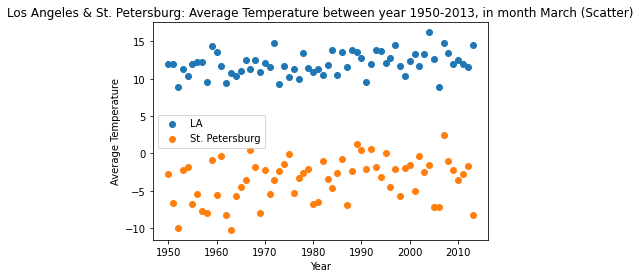

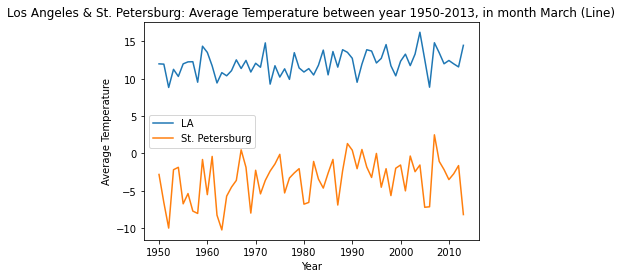

In [6]:
# get index of la
la = city_list.index('Los Angeles')

# get index of St. Petersburg
sp = city_list.index('Saint Petersburg')


# get LA dataframe for month of March from 1950-2013
la_date = date_separater(citydata_list[la])
la_march = march_data(la_date)

la_data = la_march

# get SP dataframe for month of March from 1950-2013
sp_date = date_separater(citydata_list[sp])
sp_march = march_data(sp_date)

sp_data = sp_march

# create scatter plot visualization
plt.scatter(la_data['year'],la_data['AverageTemperature'], label="LA") 
plt.scatter(sp_data['year'],sp_data['AverageTemperature'], label="St. Petersburg")
plt.title('Los Angeles & St. Petersburg: Average Temperature between year 1950-2013, in month March (Scatter)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

# create line plot visualization
plt.plot(la_data['year'],la_data['AverageTemperature'], label="LA") 
plt.plot(sp_data['year'],sp_data['AverageTemperature'], label="St. Petersburg")
plt.title('Los Angeles & St. Petersburg: Average Temperature between year 1950-2013, in month March (Line)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

The scatter and line plots of Los Angeles and St. Petersburg display the average temperatures of March 1st, 1950 to March 1st, 2013. From both plots, we can see that despite the temperatures being taken during March, Los Angeles is significantly warmer than St. Petersburg because the former has positive average temperatures whereas the latter has negative average temperatures. When examining the plots, we can also see that throughout the years, both cities display similar patterns of temperature changes, although the temperature seems to fluctuate a lot more for St. Petersburg. Generally, both cities have had temperature peaks and troughs during the the same time. This relates to our hypothesis because it demonstrates that while the two cities have completely different average temperatures, they are affected similarly as shown with the temperature patterns, so we would expect both models to have a similar accuracy.

# Models

## 1. Linear Regression

In [7]:
# LA Linear Regression
la_dataML = la_data.copy()
la_dataML.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,lat,long,year_int
133060,1950-03-01,11.984,0.308,Los Angeles,United States,34.56N,118.70W,1950,03,34.56,118.7,1950
133072,1951-03-01,11.947,0.290,Los Angeles,United States,34.56N,118.70W,1951,03,34.56,118.7,1951
133084,1952-03-01,8.828,0.354,Los Angeles,United States,34.56N,118.70W,1952,03,34.56,118.7,1952
133096,1953-03-01,11.250,0.171,Los Angeles,United States,34.56N,118.70W,1953,03,34.56,118.7,1953
133108,1954-03-01,10.302,0.393,Los Angeles,United States,34.56N,118.70W,1954,03,34.56,118.7,1954


In [8]:
# LA inputs and outputs
la_inputs = la_dataML[['year_int']]
la_outputs = la_dataML['AverageTemperature']

In [9]:
# SP linear regression
sp_dataML = sp_data.copy()
sp_dataML.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month,lat,long,year_int
195917,1950-03-01,-2.812,0.398,Saint Petersburg,Russia,60.27N,29.19E,1950,03,60.27,29.19,1950
195929,1951-03-01,-6.573,0.383,Saint Petersburg,Russia,60.27N,29.19E,1951,03,60.27,29.19,1951
195941,1952-03-01,-9.986,0.557,Saint Petersburg,Russia,60.27N,29.19E,1952,03,60.27,29.19,1952
195953,1953-03-01,-2.178,0.314,Saint Petersburg,Russia,60.27N,29.19E,1953,03,60.27,29.19,1953
195965,1954-03-01,-1.855,0.171,Saint Petersburg,Russia,60.27N,29.19E,1954,03,60.27,29.19,1954


In [10]:
# SP inputs and outputs
sp_inputs = sp_dataML[['year_int']]
sp_outputs = sp_dataML['AverageTemperature']

Score: 0.08494438810511884


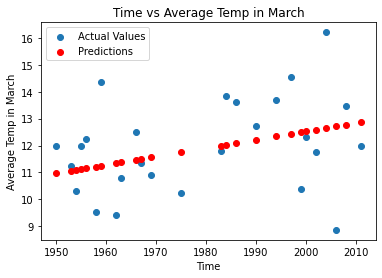

In [11]:
# LA Linear Regression
lin_reg=LinearRegression()
lax_train, lax_test, lay_train, lay_test = train_test_split(la_inputs, la_outputs, test_size=0.4, random_state=42)
lin_reg.fit(lax_train, lay_train)
lapredictions = lin_reg.predict(lax_test)
print("Score:", lin_reg.score(lax_test, lay_test))
plt.scatter(lax_test, lay_test)
plt.scatter(lax_test, lapredictions, color="red")
plt.legend(["Actual Values","Predictions"])
plt.title('Time vs Average Temp in March')
plt.xlabel('Time')
plt.ylabel('Average Temp in March')
plt.show()

Score: 0.09148989553245568


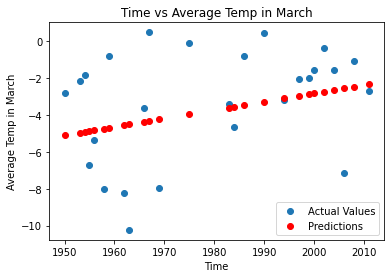

In [12]:
# St. Petersburg Linear Regression
lin_reg=LinearRegression()
spx_train, spx_test, spy_train, spy_test = train_test_split(sp_inputs, sp_outputs, test_size=0.4, random_state=42)
lin_reg.fit(spx_train, spy_train)
sppredictions = lin_reg.predict(spx_test)
print("Score:", lin_reg.score(spx_test, spy_test))
plt.scatter(spx_test, spy_test)
plt.scatter(spx_test, sppredictions, color="red")
plt.legend(["Actual Values","Predictions"])
plt.title('Time vs Average Temp in March')
plt.xlabel('Time')
plt.ylabel('Average Temp in March')
plt.show()

### Linear Regression Analysis
We have decided to use a linear regression to use previously recorded temperatures to predict future temperatures in cities such as Los Angeles and St. Petersburg. We call a function in sklearn called `LinearRegression` and stored the result in `lin_reg`. `lin_reg` now is an object that contains several functions to make predictions. Given the known years and corresponding temperatures in the month of March, we use this data to predict the temperatures.
<br>
<br>
After using a linear regression model on the data for Los Angeles and St. Petersburg, we see that the scores for these cities are 0.08494438810511884 and 0.09148989553245568, respectively. We have learned that these scores are an indicator of how accurate the predictions are with the best score being 1. Given that our scores are not high and closer to 0 than 1, we can see that our predictions of temperatures in the month of March for Los Angeles and St. Petersburg are not very accurate. One thing to consider is that these models don't account for any potential population changes that occured in this timeframe.

## 2. Time Series Autoregression

Source: https://www.econometrics-with-r.org/14-ittsraf.html
<br>
<br>
For our second model, we have chosen to do a time series autoregression model. According to the textbook cited above, time series is often used for data "collected for a single entity over time." As our data represents the temperatures of a specific city from 1950 to 2013 on the first day of March, we thought that this model was most appropriate. We also hoped that this model would take into consideration any population changes that occured from 1950-2013.

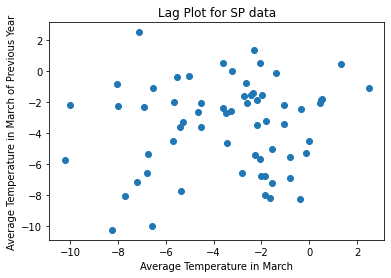

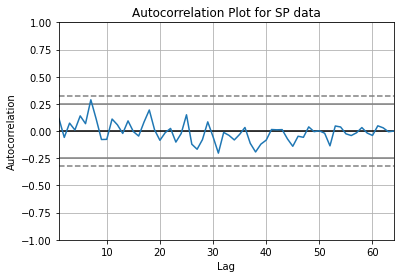

In [13]:
# Lag plot for St. Petersburg
lag_plot(sp_data["AverageTemperature"])
plt.title ("Lag Plot for SP data")
plt.xlabel("Average Temperature in March")
plt.ylabel("Average Temperature in March of Previous Year")
plt.show()

# autocorrelation plot for SP data
autocorrelation_plot(sp_data["AverageTemperature"])
plt.title ("Autocorrelation Plot for SP data")
plt.show()

### St. Petersburg Data
For our data about the city of St. Petersburg, we constructed a lag plot to see if there was an autocorrelation in our time series dataset using the lag_plot() function provided in Pandas. We run the temperature data on the x-axis against the temperature data on the previous year on the y-axis. There appears to be some diagonal line from the values -8 to -4 in the x-axis. However, most of the plots are scattered and do not give a strong line. Given that there is no definitive pattern in the scatter plot as each temperature seems to be independent, we cannot say that this plot shows a relationship between the temperature and temperature of the previous year in St. Petersburg.
<br>
<br>
We also made an autocorrelation plot, which plots the correlation coefficient for each lag variable from the previously constructed plot. The horizontal axis is the lag variable while the vertical axis is the corresponding correlation coefficient value between -1 and 1. The solid and dashed lines represent a 95% and 99% confidence interval, respectively. While none of the values pass the 99% confidence interval line, there is one value (8) that is above the 95% confidence interval line, so we decided to use 8 as our lag value, as it seemed to be the most significant lag value compared to the rest

MSE:  8.638858726579555


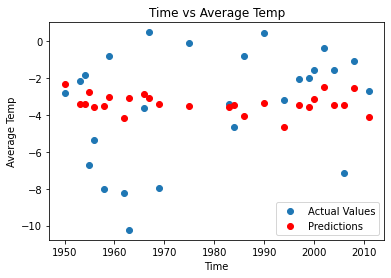

In [14]:
# Source: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
model = AutoReg(spy_train, lags=8)
model_fit = model.fit()
predictions = model_fit.predict(start=len(spy_train), end=len(spy_train)+len(spy_test)-1, dynamic=False)
print("MSE: ", mean_squared_error(spy_test, predictions))
plt.scatter(spx_test, spy_test)
plt.scatter(spx_test, predictions, color="red")
plt.legend(["Actual Values","Predictions"])
plt.title('Time vs Average Temp')
plt.xlabel('Time')
plt.ylabel('Average Temp')
plt.show()

As defined in the source link, an autoregression model is a linear regression model that uses lagged variables as input variables. When using this model, we see from the scatter plot that the average temperature of St. Petersburg in the month of March was expected to be roughly between -4 and -2 degrees consistently over the span of approximately 60 years. This forecast differs from the actual values as the reported temperatures varied from -10 to 0 degrees during this same span. 
<br>
<br>
The mean-squared error of this model is 8.638858726579555. This value tells how close our predicted temperature values from the regression model is to our actual data. As our MSE is 8.638858726579555, this means that for the city of St. Petersburg, our data is not very close to the line of best fit determined from the model.

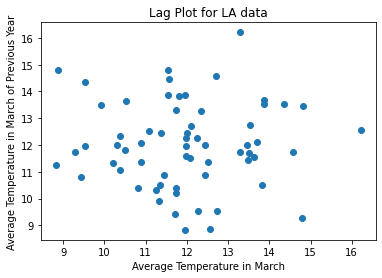

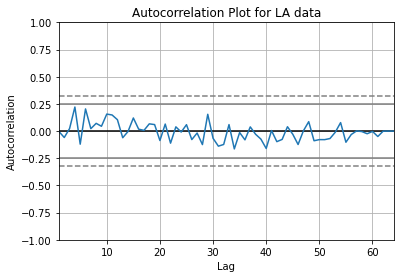

In [15]:
# Lag plot for LA
lag_plot(la_data["AverageTemperature"])
plt.title ("Lag Plot for LA data")
plt.xlabel("Average Temperature in March")
plt.ylabel("Average Temperature in March of Previous Year")
plt.show()

# autocorrelation plot for LA data
autocorrelation_plot(la_data["AverageTemperature"])
plt.title ("Autocorrelation Plot for LA data")
plt.show()

### Los Angeles Data
For our data about the city of Los Angeles, we constructed a lag plot to see if there was an autocorrelation in our time series dataset using the lag_plot() function provided in Pandas. We run the temperature data on the x-axis against the temperature data on the previous year on the y-axis. Given that there is no definitive pattern in the scatter plot as each temperature seems to be independent, we cannot say that this plot shows a relationship between the temperature and temperature of the previous year in Los Angeles.
<br>
<br>
We also made an autocorrelation plot, which plots the correlation coefficient for each lag variable from the previously constructed plot. The horizontal axis is the lag variable while the vertical axis is the corresponding correlation coefficient value between -1 and 1. The solid and dashed lines represent a 95% and 99% confidence interval, respectively. As none of the correlation coefficient values pass these lines, no correlation coefficient value is more significant than the others. Since this was the case, we also decided to use a lag value of 8 so as to give a better comparison between the St. Petersburg model and the Los Angeles model, since the lag value was 8 for the St. Petersburg model.

MSE:  247.6940078749513


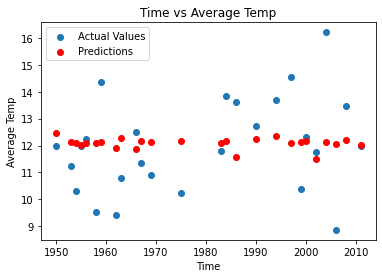

In [16]:
# Source: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
model = AutoReg(lay_train, lags=8)
model_fit = model.fit()
predictions = model_fit.predict(start=len(lay_train), end=len(lay_train)+len(lay_test)-1, dynamic=False)
print("MSE: ", mean_squared_error(spy_test, predictions))
plt.scatter(lax_test, lay_test)
plt.scatter(lax_test, predictions, color="red")
plt.legend(["Actual Values","Predictions"])
plt.title('Time vs Average Temp')
plt.xlabel('Time')
plt.ylabel('Average Temp')
plt.show()

When using this model for the city of Los Angeles, we see from the scatter plot that the average temperature in the month of March was expected to be roughly 12 degrees consistently over the span of approximately 60 years. This forecast differs from the actual values as the reported temperatures varied from 9 to 16 degrees during this same span. 
<br>
<br>
The mean-squared error of this model is 247.6940078749513. This value tells how close our predicted temperature values from the regression model is to our actual data. As our MSE is 247.6940078749513, this means that for the city of Los Angeles, our data is not very far to the line of best fit determined from the model.
<br>
<br>
Comparing the autoregression models used for Los Angeles and St. Petersburg during the same month and same span of time, we can see that the models were not very accurate in their predictions of the temperatures. The autoregression model for Los Angeles had a MSE that was significantly larger than that of St. Petersburg, showing us that the autoregression model was a lot more inaccurate given that the actual values were not close to the predictions.

## Conclusion
Comparing the linear regression models and the time series autoregression models for Los Angeles and St. Petersburg in the month of March from 1950 to 2013, we can see that both models were similar in that they did not provide accurate predictions in the average temperatures. The linear regression models had scores that were not greater than 0.1, where the best score is a 1. This suggests that the linear regression model is not a good model to predict temperatures for the two cities. The time series autoregression models also showed that there was no relationship between year and average temperatures because the lag plots for the two cities were very scattered and showed no correlation. In addition, while the model predicted a consistent value for the temperatures throughout the period of time, the actual temperatures reported for both cities varied greatly. This led to high MSEs, especially shown with the city of Los Angeles (247.6940078749513). This tells us that the time series autoregression models were not a good indicator to predict average temperatures for the two cities over a period of time. When creating these two models, we examined the relationship between year and average temperature for the cities of Los Angeles and St. Petersburg in the month of March over a span of roughly 60 years. The information from the models tells us that you cannot make an accurate prediction of the temperature from 1950-2013 just based off of temperature data from 1950-1957. The St. Petersburg model had better accuracy then the Los Angeles model, since the MSE was significantly smaller, but the MSE of the St. Petersburg model was still large. This tells us that the accuracy of the models is about the same in that both models are not accurate, so in that way, our hypothesis was correct. One thing that we could do, if we had more time, would be to look at the population changes and factor that into our machine learning model. We could also look at other data such as CO2 emissions or change in number of cars, but we would have to be careful as these two things are related to population changes and we wouldn't want the variables in our model to be 